In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ls

drive/  sample_data/


In [4]:
cd "/content/drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_car"

/content/drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_car


In [8]:
ls data/car.h5

data/car.h5


In [0]:
df = pd.read_hdf('data/car.h5')

In [12]:
pip install tables==3.6.1

     |████████████████████████████████| 4.3MB 4.8MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [6]:
df.shape

(106494, 155)

In [7]:
df.columns

Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       ...
       'param_pearl', 'param_stan', 'param_wersja', 'param_emisja-co2',
       'param_body-type', 'param_matowy', 'param_bezwypadkowy',
       'param_akryl-(niemetalizowany)', 'param_monthly-payment-value',
       'car_id'],
      dtype='object', length=155)

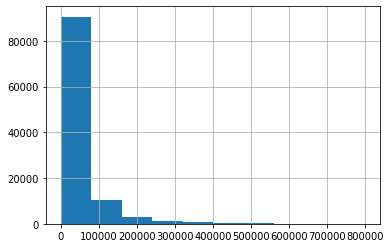

In [8]:
df['price_value'].hist()

In [9]:
df['price_value'].describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [12]:
df['param_marka-pojazdu'].unique()

array(['Dacia', 'Peugeot', 'Porsche', 'Volkswagen', 'Škoda', 'Jeep',
       'Renault', 'Opel', 'Volvo', 'Audi', 'BMW', 'Toyota', 'Kia',
       'Hyundai', 'Citroën', 'Nissan', 'Daewoo', 'Fiat', 'Mercedes-Benz',
       'Mini', 'Ford', 'Chevrolet', 'Infiniti', 'Suzuki', 'Lexus', 'Seat',
       'Mitsubishi', 'SsangYong', 'Mazda', 'Alfa Romeo', 'Saab', 'Dodge',
       'Jaguar', 'Honda', 'Smart', 'Land Rover', 'Chrysler',
       'Aston Martin', 'Subaru', 'Piaggio', 'Daihatsu', 'Cadillac',
       'Lada', 'Iveco', 'Lincoln', 'Inny', 'Lancia', 'Yugo', 'Pontiac',
       'MG', 'Scion', None, 'Hummer', 'Polonez', 'Maybach', 'Maserati',
       'Aixam', 'Bentley', 'Lamborghini', 'Isuzu', 'Gaz', 'Rover',
       'Wartburg', 'Mercury', 'Ferrari', 'Oldsmobile', 'Rolls-Royce',
       'Moskwicz', 'Ligier', 'Vauxhall', 'Tesla', 'Microcar', 'Acura',
       'Buick', 'Tarpan', 'Uaz', 'McLaren', 'GMC', 'Warszawa', 'Morgan',
       'Żuk', 'Tata', 'Brilliance', 'Triumph', 'Chatenet', 'Zastava',
       'Wołga', '

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f31c8e3ae10>,
      dtype=object)

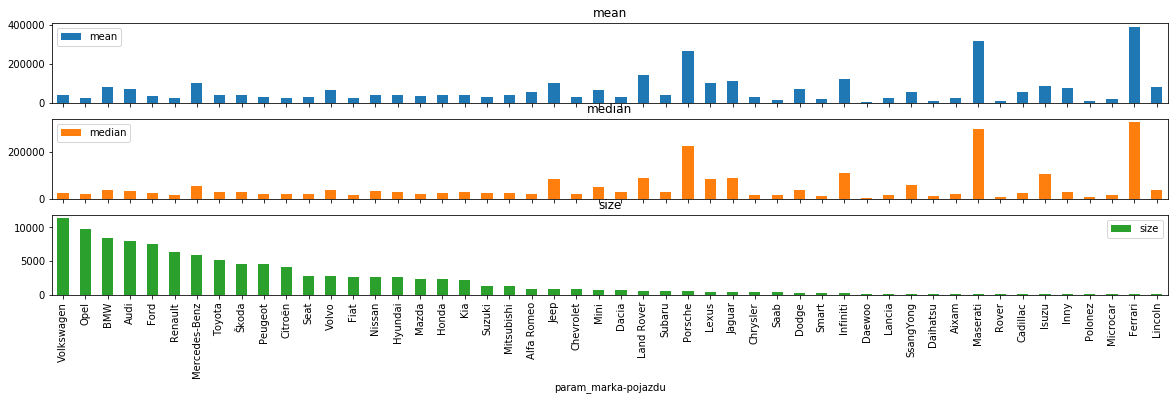

In [28]:

(
  df
  .groupby('param_marka-pojazdu')[('price_value')]
  .agg([np.mean, np.median, np.size])
  .sort_values(by= 'size', ascending=False) # przy wielu funkcjach musimy podac po czym sortujemy 
  .head(50)
).plot(kind='bar', figsize=(20,5), subplots=True) # każdy inny wykres na funkcję

In [0]:
def group_and_barplot(feat_groupby,feat_agg='price_value',agg_funcs=[np.mean, np.median, np.size], feat_sort='mean', top=50, subplots=True):
  return (
    df
   .groupby(feat_groupby)[feat_agg]
   .agg(agg_funcs)
    .sort_values(by= feat_sort, ascending=False) 
    .head(top)
  ).plot(kind='bar', figsize=(20,5), subplots=subplots) 

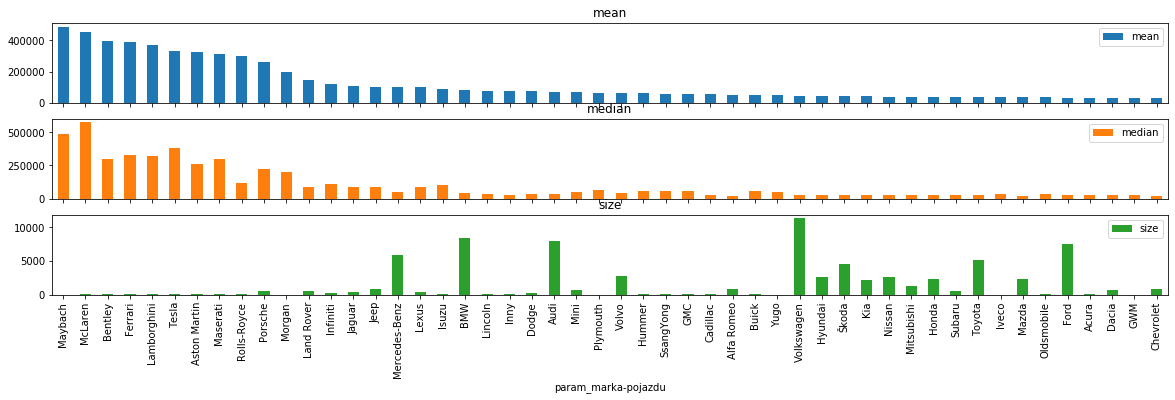

In [34]:
group_and_barplot('param_marka-pojazdu'); # średnik na końcu pozwala na wyświetlanie tylko wykresu, bez array

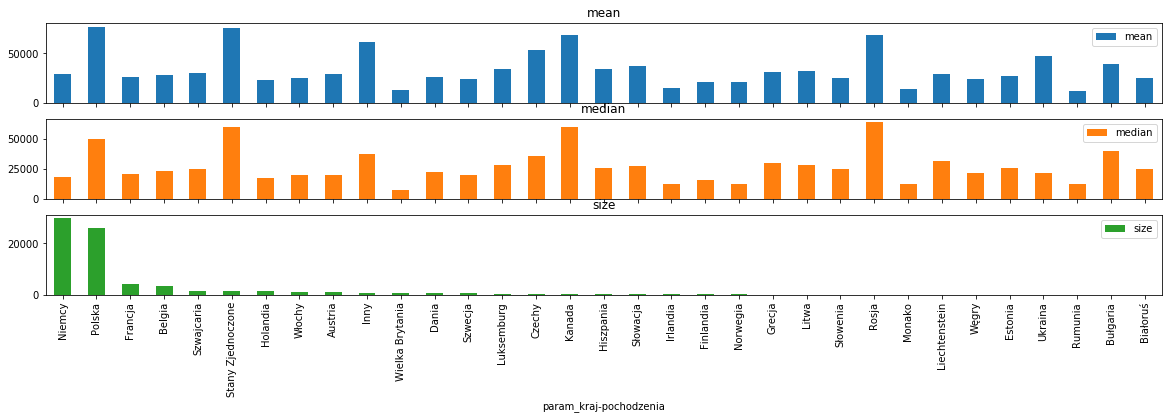

In [37]:
group_and_barplot('param_kraj-pochodzenia', feat_sort='size');

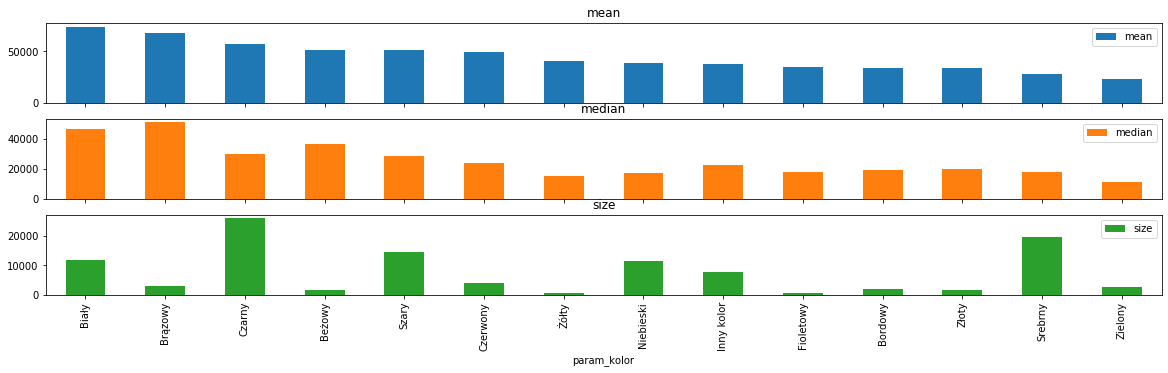

In [39]:
group_and_barplot('param_kolor');